# Анализ данных компании "Мегалайн"

#### В нашем распоряжении – данные 500 пользователей компании "Мегалайн", федерального оператора сотовой связи, за 2018 год. У компании всего два тарифных плана "Смарт" (ежемесячная плата 550 руб.) и "Ультра" (ежемесячная плата 1950 руб.). Необходимо выяснить, какой из тарифов приносит компании больше денег. Результаты исследования лягут в основу решения коммерческого департамента компании о рекламном бюджете, какой из тарифов продвигать активнее.

##### Часть 1. Изучение общей информации
* [1.1 Изученеие файла с данными, загрузка библиотек](#1-bullet)
* [1.2 Определение и изучение пропущенных значений](#2-bullet)

##### Часть 2. Подготовка данных
* [2.1 Обработка пропусков](#3-bullet)
* [2.2 Приведение данных к нужным типам](#4-bullet)
* [2.3 Выявление ошибок в данных](#5-bullet)
* [2.4 Создание сведенной таблицы](#6-bullet)

##### Часть 3. Анализ данных
* [3.1 Какой из тарифов приносит больше денег компании](#7-bullet)
* [3.2 Портрет ежемесячных потребностей пользователя тарифов "Смарт" и "Ультра"](#8-bullet)

##### Часть 4. Проверка гипотез
* [4.1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается](#9-bullet)
* [4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#10-bullet)

##### [Выводы](#11-bullet)

### Часть 1. Изучение общей информации
<a id='1-bullet'></a>
#### 1.1 Обзор файлов с данными, загрузка библиотек

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import random
import math as mt

In [2]:
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

In [3]:
for i in [calls, internet, messages, tariffs, users]:
    display(i.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Датасеты calls, internet и messages – ключевые для актуального исследования, их мы будем анализировать для подсчета прибыльности тарифов.


Датаест tariffs содержит справочную информацию о тарифах, с которой можно сверяться.


Датасет users позволит при необходимости изучить портрет пользователей и, например, сегментировать новых и старых клиентов, разделить клиентов на возрастные когорты.

In [4]:
for i in [calls, internet, messages, tariffs, users]:
    display(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 208.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.3+ KB


None

Обратим внимание, что ключевые для нас датасеты – разных размеров. Судя по всему, сообщения отправляют реже, чем пользуются интернетом и звонят, а звонят, чаще, чем пользуются интернетом. Кроме того, из-за этого совмещать датасеты по id услуги не удастся, мы можем совмещать их только по id пользователей, предварительно собрав информацию по каждому пользователю о количестве использованных минут, мегабайт и сообщений.

In [5]:
for i in [calls, internet, messages, tariffs, users]:
    display(i.duplicated().sum())

0

0

0

0

0

Дубликатов не обнаружено.

In [6]:
for i in [calls, internet, messages, users]:
    print(len(i['user_id'].unique()), '\n')

492 

497 

426 

500 



# Часть 2. Подготовка данных
<a id='3-bullet'></a>
## 2.1 Обработка пропусков

В ключевых датасетах – calls, internet и messages нет пропусков. Остальные датасеты пока не представляют для исследования интереса.

<a id='4-bullet'></a>
## 2.2 Приведение данных к нужным типам

In [7]:
for i in [calls, internet, messages, users]:
    print(i.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None 

<class 'pandas.core.f

Переведем в датасетах calls, internet и messages столбцы user id в формат object (это позволит соотносить эти столбцы с соответсвтующими id), а также столбцы с датами приведем в формат datetime.

#### Переводим колонку user_id в формат str

In [8]:
for i in [calls, internet, messages, users]:
    i['user_id'] = i['user_id'].astype(str)

In [9]:
for i in [calls, internet, messages, users]:
    print(i.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null object
dtypes: float64(1), object(3)
memory usage: 6.2+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 5.7+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null object
dtypes: object(3)
memory usage: 2.8+ MB
None 

<class 'pandas.core.frame.DataFrame'>


#### Переводим колонки с датами в формат datetime

In [10]:
for i in [calls, internet, messages]:
    print(i.head(2))

       id   call_date  duration user_id
0  1000_0  2018-07-25       0.0    1000
1  1000_1  2018-08-17       0.0    1000
   Unnamed: 0      id  mb_used session_date user_id
0           0  1000_0   112.95   2018-11-25    1000
1           1  1000_1  1052.81   2018-09-07    1000
       id message_date user_id
0  1000_0   2018-06-27    1000
1  1000_1   2018-10-08    1000


In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT')

In [12]:
for i in [calls, internet, messages]:
    print(i.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 6.2+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.7+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null object
dtypes: datetime64[ns](

<a id='5-bullet'></a>
## 2.3 Выявление ошибок в данных

#### Calls

In [13]:
calls.columns

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

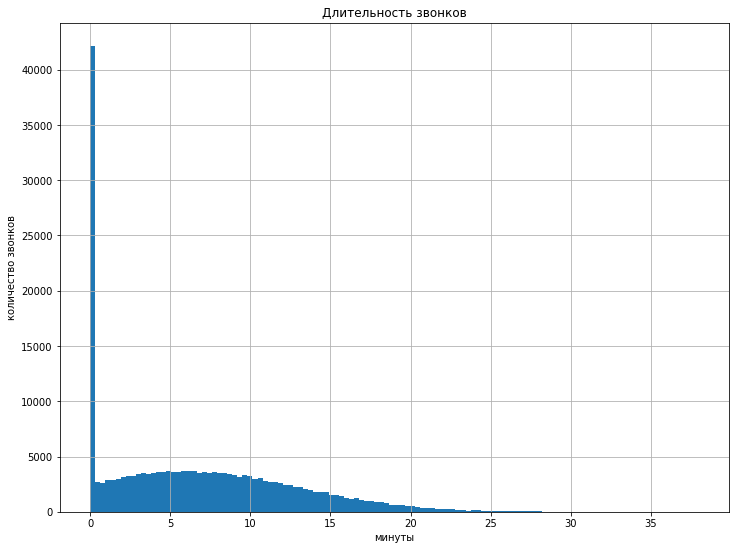

In [14]:
calls['duration'].hist(bins=120, figsize=(12,9))
plt.title('Длительность звонков')
plt.xlabel('минуты')
plt.ylabel('количество звонков')
plt.show()

В датасете часто встречаются звонки длительностью 0 минут – на гистограмме заметен очень сильный выброс. Эти звонки стоит убрать из датасета – согласно правилам "Мегалайн" всегда округляет вверх значения минут и мегабайтов, то есть, если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута, но в этих случаях пользоватлеь не поговорил ни минуты, а значит не заплатил и не израсходовал часть тарифа. Эти взонки нулевой длительности не представляют интереса для нашего исследования.

In [15]:
len(calls['user_id'].unique())

492

In [16]:
len(calls.query('duration != 0')['user_id'].unique())

492

Кроме того, исключение звонков с нулевой длительностью не сократит представленность пользователей в датасете звонков.

In [17]:
calls = calls.query('duration != 0')

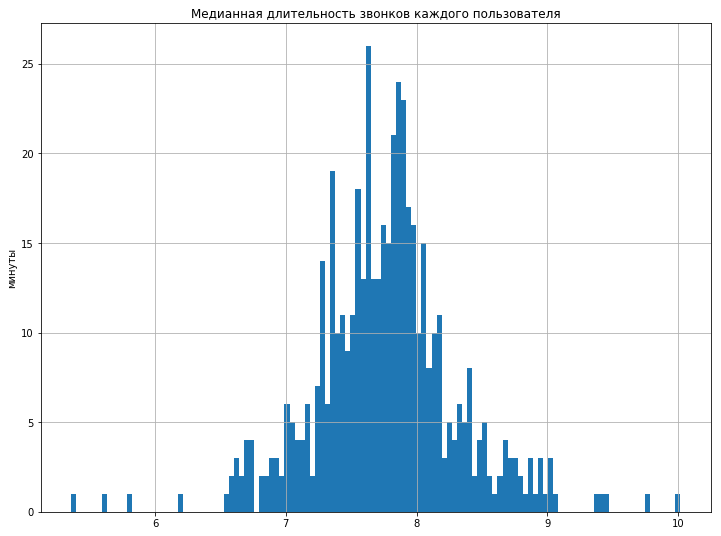

In [18]:
calls.groupby('user_id')['duration'].median().hist(bins=120, figsize=(12,9))
plt.title('Медианная длительность звонков каждого пользователя')
plt.ylabel('минуты')
plt.show()

Большая часть пользователей говорит по 10-15 минут.

In [19]:
calls['call_date'].value_counts()

2018-12-31    1173
2018-12-30     959
2018-12-29     959
2018-12-22     957
2018-12-18     942
2018-12-26     936
2018-12-21     927
2018-12-17     926
2018-12-25     919
2018-12-20     913
2018-12-27     902
2018-12-14     900
2018-11-24     899
2018-12-02     892
2018-12-28     887
2018-12-09     887
2018-12-08     880
2018-12-13     873
2018-12-15     867
2018-12-24     867
2018-12-06     858
2018-11-25     852
2018-12-23     847
2018-11-30     844
2018-11-27     842
2018-12-19     832
2018-12-05     832
2018-12-03     832
2018-12-12     826
2018-11-26     824
              ... 
2018-02-06      69
2018-01-27      68
2018-01-29      66
2018-01-25      65
2018-01-26      64
2018-01-28      64
2018-01-24      64
2018-01-21      52
2018-01-19      44
2018-01-18      42
2018-01-23      41
2018-01-16      37
2018-01-22      35
2018-01-15      35
2018-01-20      33
2018-01-12      32
2018-01-17      31
2018-01-14      29
2018-01-11      28
2018-01-08      28
2018-01-13      25
2018-01-10  

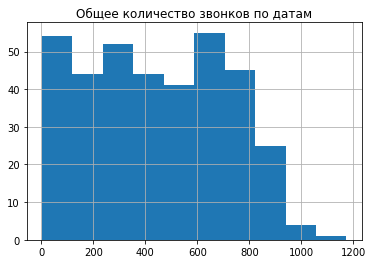

In [20]:
calls['call_date'].value_counts().hist()
plt.title('Общее количество звонков по датам')
plt.show()

Повышенное количество звонков – более 1000 приходится на вторую половину декабря, ничего удивительного. Основная масса звонков – от 0 до 1000 в день для выборки в 500 пользователей.

#### Internet

In [21]:
internet.columns

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

В датасете есть загадочная колонка Unnamed:0. В датасете есть все, что нам нужно – количество использованных мегабайт, дата сессий, айди услуги и айди пользователя. Колонка с названием, которое невозомжно идентифицировать – нам не нужна. Стоит обратиться к разработчикам и уточнить, что они выгружали в эту колонку, но так или иначе на этом этапе она в нашем исследовании не нужна. Удаляем.

In [22]:
internet = internet.drop(['Unnamed: 0'],axis=1)

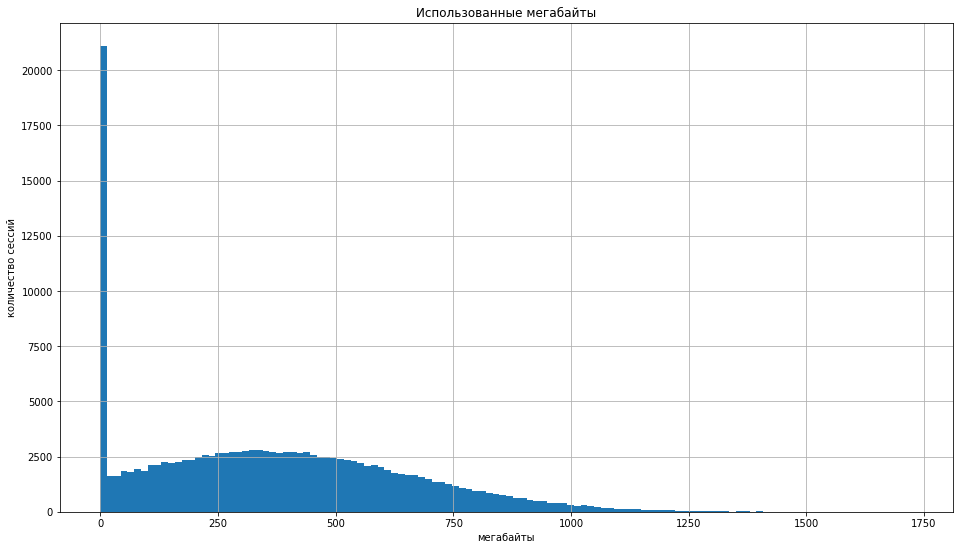

In [23]:
internet['mb_used'].hist(bins=120, figsize=(16,9))
plt.title('Использованные мегабайты')
plt.xlabel('мегабайты')
plt.ylabel('количество сессий')
plt.show()

Аналогично случаю с датасетам о звонках, в датасете об использованном интернет-траффике, нас не интересуют сессии, в которых не было потрачено ни одного мегабайта – это не принесло денег компании, расходования трафика не случилось. Исключим эти случаи из выборки.

In [24]:
len(internet['user_id'].unique())

497

In [25]:
len(internet.query('mb_used != 0')['user_id'].unique())

497

In [26]:
internet = internet.query('mb_used != 0')

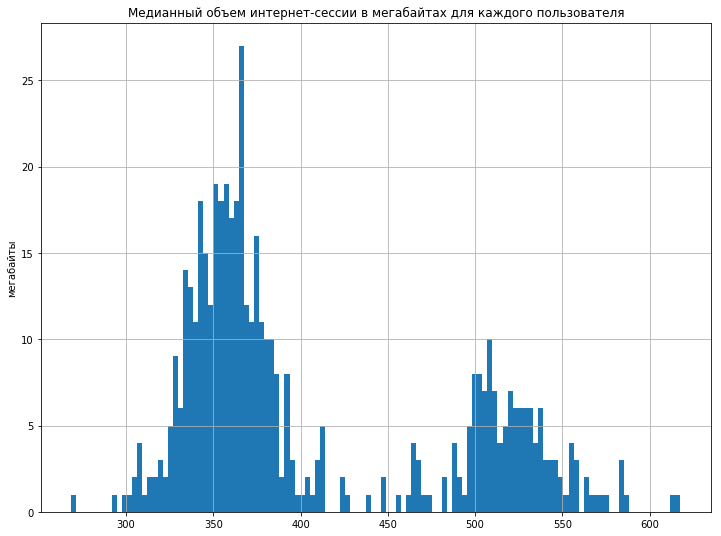

In [27]:
internet.groupby('user_id')['mb_used'].median().hist(bins=120, figsize=(12,9))
plt.title('Медианный объем интернет-сессии в мегабайтах для каждого пользователя')
plt.ylabel('мегабайты')
plt.show()

На гистограмме заметно, что есть две группы пользователей: одна тратит много интернета, другая – меньше. Это соответствует дуализму тарифоф "Мегалайна".

In [28]:
internet['session_date'].value_counts()

2018-12-31    916
2018-12-30    778
2018-12-26    752
2018-12-25    747
2018-12-24    728
2018-12-21    720
2018-12-12    718
2018-12-22    715
2018-12-23    710
2018-12-02    704
2018-12-29    700
2018-12-20    698
2018-12-27    688
2018-12-28    687
2018-12-19    686
2018-12-05    686
2018-12-13    686
2018-11-29    677
2018-11-30    676
2018-12-14    673
2018-11-28    673
2018-11-15    672
2018-12-01    672
2018-12-06    670
2018-11-26    668
2018-12-04    664
2018-12-18    660
2018-11-19    659
2018-12-10    658
2018-11-07    656
             ... 
2018-02-05     54
2018-01-22     53
2018-02-03     51
2018-01-29     49
2018-01-27     48
2018-02-02     48
2018-01-25     45
2018-01-21     44
2018-01-20     39
2018-01-16     39
2018-01-17     34
2018-01-23     33
2018-01-13     33
2018-01-19     32
2018-01-24     31
2018-01-15     31
2018-01-18     30
2018-01-10     27
2018-01-14     25
2018-01-11     24
2018-01-12     20
2018-01-08     20
2018-01-09     18
2018-01-06     18
2018-01-07

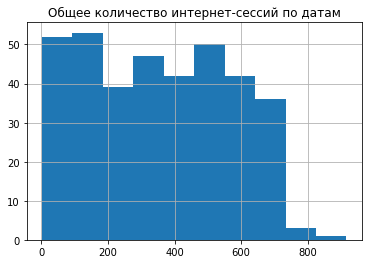

In [29]:
internet['session_date'].value_counts().hist()
plt.title('Общее количество интернет-сессий по датам')
plt.show()

Как и в случае со звонкам – повышенная активность во второй половине декабря, пониженная – на январских праздниках.

#### Messages

In [30]:
messages.columns

Index(['id', 'message_date', 'user_id'], dtype='object')

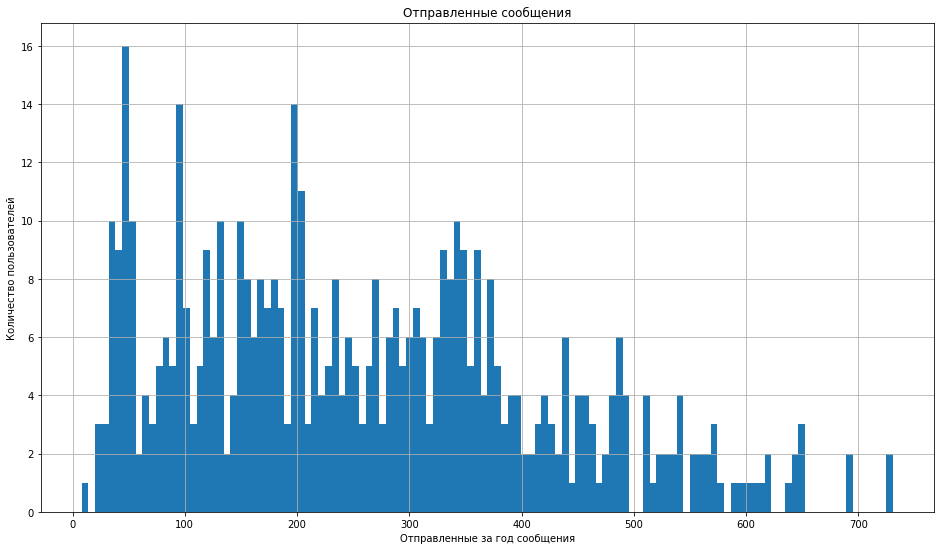

In [31]:
internet.groupby('user_id')['id'].count().hist(bins=120, figsize=(16,9))
plt.title('Отправленные сообщения')
plt.xlabel('Отправленные за год сообщения')
plt.ylabel('Количество пользователей')
plt.show()

В датасете вообще нет людей не отправивших ни одного сообщения – наверное это специфика выгрузки. В целом большая часть пользователей отправляет от нескольких до почти 500 сообщений в год.

In [32]:
messages['message_date'].value_counts()

2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-28    699
2018-12-26    699
2018-12-22    687
2018-12-25    684
2018-12-23    676
2018-12-18    675
2018-12-12    674
2018-12-13    671
2018-12-08    666
2018-11-26    665
2018-12-04    661
2018-12-19    659
2018-12-06    659
2018-11-30    657
2018-12-14    657
2018-12-20    652
2018-11-29    651
2018-12-15    649
2018-12-11    645
2018-12-24    644
2018-12-27    644
2018-12-10    643
2018-11-27    636
2018-11-25    629
2018-10-31    627
2018-11-07    625
             ... 
2018-02-03     55
2018-02-01     53
2018-01-25     52
2018-02-09     50
2018-01-24     48
2018-01-26     45
2018-01-29     44
2018-02-06     44
2018-01-31     42
2018-01-22     41
2018-01-16     34
2018-01-18     33
2018-01-21     33
2018-01-19     32
2018-01-20     32
2018-01-17     26
2018-01-15     23
2018-01-13     22
2018-01-10     22
2018-01-14     21
2018-01-09     21
2018-01-12     17
2018-01-06     15
2018-01-08     14
2018-01-11

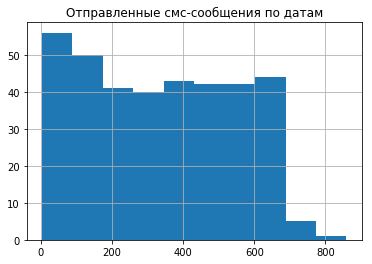

In [33]:
messages['message_date'].value_counts().hist()
plt.title('Отправленные смс-сообщения по датам')
plt.show()

Как и в случае со звонкам и интернетом – повышенная активность во второй половине декабря, пониженная – на январских праздниках.

<a id='6-bullet'></a>
## 2.4 Создание сведенной таблицы

In [34]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [35]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [36]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [37]:
calls_grouped = calls.groupby(['user_id', 'month'])['duration'].agg(['size', 'sum']).reset_index()\
    .rename({'size':'calls', 'sum':'minutes'}, axis=1)

In [38]:
calls_grouped.head()

,user_id,month,calls,minutes
0,1000,5,17,150.06
1,1000,6,28,158.90
2,1000,7,41,318.80
3,1000,8,42,389.87
4,1000,9,46,440.14


In [39]:
messages_grouped = messages.groupby(['user_id', 'month'])['message_date'].size().reset_index()\
    .rename({'message_date':'messages'}, axis=1)

In [40]:
internet_grouped = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()\
    .rename({'mb_used':'internet'}, axis=1)

In [41]:
internet_grouped.head()

,user_id,month,internet
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [42]:
data_grouped = calls_grouped.merge(messages_grouped, how='outer', on=['user_id', 'month'])

In [43]:
data_grouped = data_grouped.merge(internet_grouped, how='outer', on=['user_id', 'month'])

In [44]:
data_grouped = data_grouped.merge(users[['user_id','tariff']], how='left', on=['user_id'])

In [45]:
data_grouped['user_id'].unique().shape[0]

498

In [46]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Из выборки выпало всего 2 пользователя – которые купили тариф, но ничего не делалали – не звонили, не писали, не сидели в интернете.

In [47]:
def get_income(line):
    if line['tariff'] == 'smart':
        income = 550
        
        if line['minutes'] > 500:
            income += (line['minutes']-500)*3
            
        if line['internet'] > 15360:
            income += round((line['internet']-15360)/1024)*200
            
        if line['messages'] > 50:
            income += (line['messages'] - 50)*3
            
        return income
    
    else:
        income = 1950
        
        if line['minutes'] > 3000:
            income += (line['minutes']-3000)
        
        if line['internet'] > 30720:
            income += round((line['internet']-30720)/1024)*150
            
        if line['messages'] > 1000:
            income += (line['messages'] - 1000)
            
        return income

In [48]:
data_grouped['month'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4])

In [49]:
data_grouped['income'] = data_grouped.apply(get_income, axis=1)

In [50]:
data_grouped = data_grouped.fillna(0)

In [51]:
data_grouped

,user_id,month,calls,minutes,messages,internet,tariff,income
0,1000,5,17.0,150.06,22.0,2253.49,ultra,1950.0
1,1000,6,28.0,158.90,60.0,23233.77,ultra,1950.0
2,1000,7,41.0,318.80,75.0,14003.64,ultra,1950.0
3,1000,8,42.0,389.87,81.0,14055.93,ultra,1950.0
4,1000,9,46.0,440.14,57.0,14568.91,ultra,1950.0
5,1000,10,44.0,328.45,73.0,14702.49,ultra,1950.0
6,1000,11,37.0,319.04,58.0,14756.47,ultra,1950.0
7,1000,12,38.0,312.98,70.0,9817.61,ultra,1950.0
8,1001,11,45.0,408.12,0.0,18429.34,smart,1150.0
9,1001,12,47.0,391.34,0.0,14036.66,smart,550.0


### Промежуточный итог:
- форматы данных были приведены в порядок;
- из выборки были удалены звонки и интернет-сессии с нулевой длительностью (они не тратят базовые пакеты тарифов и не приносят доход компании), а также колонка с неидентифицированной информацией;
- была создана сводная таблица, в которой отражены ежемесячные потребности пользователей, а также доход, который пользователь приносит компании.

# Часть 3. Анализ данных
<a id='7-bullet'></a>
### 3.1 Какой из тарифов приносит больше денег компании


In [52]:
data_grouped['income'].median()

1550.0

In [53]:
data_grouped['income'].mean()

1460.8615494710625

Самый популярный доход с клиента – 1550 рублей. Для дальнейшей работы необходимо нормировать средний доход на количество месяцев, которое пользователь провел с тарифом. Не все абоненты в выборке были пользователями "Мегалайн" весь 2018 год.

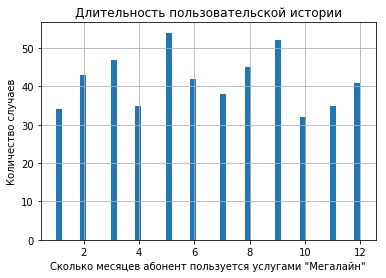

In [54]:
data_grouped.groupby('user_id')['month'].count().hist(bins=50)
plt.title('Длительность пользовательской истории')
plt.xlabel('Сколько месяцев абонент пользуется услугами "Мегалайн"')
plt.ylabel('Количество случаев')
plt.show()

In [55]:
data_grouped.groupby('user_id')['month'].count().describe()

count    498.000000
mean       6.453815
std        3.357156
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: month, dtype: float64

Больше половины пользователей в выборке пользуются услугами одного из тарифов "Мегалайн" полгода и меньше. Еще 25% выборки – пользователи, которые являются абонентами "Мегалайн" от 6 до 9 месяцев. То есть большинство абонентов – пользуются услугами компании менее года. Создадим в сводной таблице колонку с количеством месяцев, которые указаны для пользователя в выборке, а также создадим колонку со средним доходом с клиента.

In [56]:
month_count = data_grouped.groupby('user_id')['month'].count().reset_index()
month_count.columns = ['user_id', 'month_count']
data_grouped = data_grouped.merge(month_count[['user_id','month_count']], how='left', on=['user_id'])

In [57]:
mean_month = data_grouped.groupby('user_id')['income'].sum()/data_grouped.groupby('user_id')['month_count'].mean()
mean_month = mean_month.reset_index()
mean_month.columns = ['user_id', 'mean_month_income']
data_grouped = data_grouped.merge(mean_month[['user_id','mean_month_income']], how='left', on=['user_id'])

In [58]:
data_grouped.head()

,user_id,month,calls,minutes,messages,internet,tariff,income,month_count,mean_month_income
0,1000,5,17.0,150.06,22.0,2253.49,ultra,1950.0,8,1950.0
1,1000,6,28.0,158.90,60.0,23233.77,ultra,1950.0,8,1950.0
2,1000,7,41.0,318.80,75.0,14003.64,ultra,1950.0,8,1950.0
3,1000,8,42.0,389.87,81.0,14055.93,ultra,1950.0,8,1950.0
4,1000,9,46.0,440.14,57.0,14568.91,ultra,1950.0,8,1950.0


In [59]:
data_grouped.query('tariff == "smart"').groupby('user_id')['mean_month_income'].mean().mean()

1228.3361760214389

In [60]:
data_grouped.query('tariff == "smart"').groupby('user_id')['mean_month_income'].mean().median()

1098.5679166666669

In [61]:
data_grouped.query('tariff == "ultra"').groupby('user_id')['mean_month_income'].mean().mean()

2074.914187726688

In [62]:
data_grouped.query('tariff == "ultra"').groupby('user_id')['mean_month_income'].mean().median()

1950.0

Средний ежемесячный доход с клиента тарифа "Смарт" – 1228 рублей в месяц, то есть в два раза больше, чем базовая стоимость тарифа, 550 рублей. Медианное значение – 1098 рублей, значит, есть небольшая часть клиентов, которые переплачивают сверх тарифа крупные суммы, которая сдвигает среднее значение в большую сторону.

Средний ежемесячный доход с клиента тарифа "Ультра" – 2074 рубля в месяц, это почти равно ежемесячной выплате по тарифу, 1950 рублей.  Медианное значение равно ежемесячной сумме, значит нас среднее повлияли малочисленные пользователи тарифа с крупными переплатами.

Судя по медианным и средним значениям, пользователи тарифа "Ультра" почти не выходят сверх ограничений, в то время как пользователи более дешового тарифа "Смарт" очень часто выходят из ограничейни и в итоге платят двойную стоимость тарифа и более.

### Рассмотрим доход, который приносят тарифы "Смарт" и "Ультра" подробнее

### "Смарт"

In [63]:
data_grouped.query('tariff == "smart"').groupby('user_id')['mean_month_income'].mean().describe()

count     350.000000
mean     1228.336176
std       571.508571
min       550.000000
25%       798.148333
50%      1098.567917
75%      1550.000000
max      4173.756667
Name: mean_month_income, dtype: float64

In [64]:
smart_income_std = np.std(data_grouped.query('tariff == "smart"').groupby('user_id')['mean_month_income'].mean(), ddof=1)
smart_income_mean = data_grouped.query('tariff == "smart"').groupby('user_id')['mean_month_income'].mean().mean()

In [65]:
smart_income_bottom = smart_income_mean-smart_income_std*3
smart_income_top = smart_income_mean+smart_income_std*3
smart_income_bottom, smart_income_top

(-486.1895360648882, 2942.861888107766)

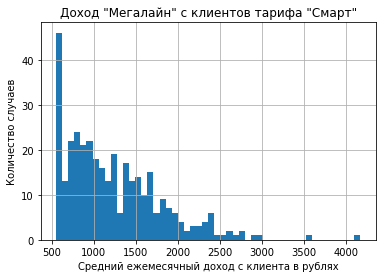

In [66]:
data_grouped.query('tariff == "smart"').groupby('user_id')['mean_month_income'].mean().hist(bins=50)
plt.title('Доход "Мегалайн" с клиентов тарифа "Смарт"')
plt.xlabel('Средний ежемесячный доход с клиента в рублях')
plt.ylabel('Количество случаев')
plt.show()

Распределение на гистограмме выглядит нормальным, со скошенным краем слева и сильным пиком на значении 550: это пользователи тарифа "Смарт", которые умещаются в ограничения тарифа. 99% пользователей платят в месяц до 2942 рублей. Половина абонентов тарифа "Смарт" платит в месяц от 2 до 4 раз больше базовой стоимости тарифа, то есть ежемесячно переплачивают от 500 до 1500 тысяч рублей. Доля клиентов, которые полностью умещаются в рамки тарифа "Смарт"– не превышает четверти. Максимальная ежемесячная доплата по тарифу, встреченная в выборке, – 3623 рубля.

### "Ультра"

In [67]:
data_grouped.query('tariff == "ultra"').groupby('user_id')['mean_month_income'].mean().describe()

count     148.000000
mean     2074.914188
std       278.583700
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1975.446429
max      3225.000000
Name: mean_month_income, dtype: float64

In [68]:
ultra_income_std = np.std(data_grouped.query('tariff == "ultra"').groupby('user_id')['mean_month_income'].mean(), ddof=1)
ultra_income_mean = data_grouped.query('tariff == "ultra"').groupby('user_id')['mean_month_income'].mean().mean()

In [69]:
ultra_income_bottom = ultra_income_mean-ultra_income_std*3
ultra_income_top = ultra_income_mean+ultra_income_std*3
ultra_income_bottom, ultra_income_top

(1239.1630877992911, 2910.6652876540848)

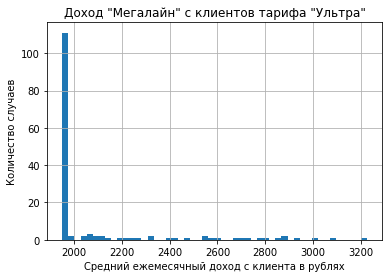

In [70]:
data_grouped.query('tariff == "ultra"').groupby('user_id')['mean_month_income'].mean().hist(bins=50)
plt.title('Доход "Мегалайн" с клиентов тарифа "Ультра"')
plt.xlabel('Средний ежемесячный доход с клиента в рублях')
plt.ylabel('Количество случаев')
plt.show()

75% пользователей тарифа "Ультра" укладываются в рамки тарифа или совершают незначительные доплаты. Однако остальные 25% клиентов тарифа совершают значительные доплаты от 75 до 1305 рублей в месяц. Максимальная ежемесячная доплата по тарифу, встреченная в выборке, – 1305 рублей.

Рассмотрим представленность в выборке пользователей разных тарифов.

In [71]:
data_grouped.query('tariff == "ultra"')['income'].count()/data_grouped.shape[0]

0.30647168637212197

In [72]:
data_grouped.query('tariff == "smart"')['income'].count()/data_grouped.shape[0]

0.693528313627878

70% пользователей выбирают тариф "Смарт" и 30% пользователей выбирают тариф "Ультра".

### Промежуточный итог:
- Большинство клиентов "Мегалайн" выбирают тариф "Смарт" (70%). Менее четверти этих абонентов укладывается в ограничения тарифа и не приносит компании дополнительного дохода. Половина клиентов переплачивает ежемесячно от 500 до 1500 рублей. Оставшаяся часть клиентов приносит компании ежемесячно более значительные суммы сверх тарифа: от 1500 до 3500 тысяч рублей.
- Всего треть абонентов "Мегалайн" выбирает тариф "Ультра" и подавляющая часть этих клиентов (75%) укладывается в ограничения тарифа. Лишь четверть клиентов совершает существенные ежемесячные доплаты – от 100 до 1300 рублей в месяц.
- Клиенты тарифа "Смарт" приносят компании значительно больше средств сверх тарифа и чаще не укладываются в ограничения, чем клиенты тарифа "Ультра". Однако в средний доход с клиентов тарифа "Смарт" все равно меньше, чем доход с клиентов "Ультра" (округляя, отношение выглядит, как 1200 рублей в месяц против 2000).

<a id='8-bullet'></a>
### 3.2 Портрет ежемесячных потребностей пользователя тарифов "Смарт" и "Ультра"

### Звонки – "Смарт"

Среди пользователей тарифа "Смарт" очень много людей, которые не превышают лимитов тарифа. Поэтому, если учитывать таких пользователей, средний ежемесячный доход сверх тарифа с пользователя тарифа "Смарт" для компании – всего 3 рубля. 

In [73]:
data_grouped.query('tariff == "smart"')['income'].mean()

1196.3252669358437

In [74]:
s_minutes_mean = data_grouped.query('tariff == "smart"')['minutes'].mean()
s_minutes_median = data_grouped.query('tariff == "smart"')['minutes'].median()
s_minutes_var = np.var(data_grouped.query('tariff == "smart"')['minutes'], ddof=1)
s_minutes_std = np.std(data_grouped.query('tariff == "smart"')['minutes'], ddof=1)

In [75]:
s_minutes_bottom = s_minutes_mean-s_minutes_std*3
s_minutes_top = s_minutes_mean+s_minutes_std*3
s_minutes_bottom, s_minutes_top

(-145.45959568142428, 934.3136468254364)

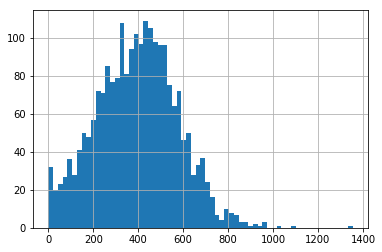

In [76]:
data_grouped.query('tariff == "smart"')['minutes'].hist(bins=64)

In [77]:
data_grouped.query('tariff == "smart"')['minutes'].describe()

count    2229.000000
mean      394.427026
std       179.962207
min         0.000000
25%       267.230000
50%       397.980000
75%       515.070000
max      1354.220000
Name: minutes, dtype: float64

In [78]:
data_grouped.query('tariff == "smart" and minutes <= 500')['minutes'].shape[0]/data_grouped.query('tariff == "smart"')['minutes'].shape[0]

0.7205024674742037

In [79]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Распределение похоже на нормальное – со скошенным краем слева (пользователи не могли наговорить отрицательное количество минут). В 99% случаев (то есть месяцев) пользователи тарифа "Смарт" потратили от 0 до 932 минут. На гистограмме заметен небольшой выброс на отметке 0 – часть пользователей вообще не пользуется звонками, а вместо этого пишет смсм или сидит в интернете. 72% случаев – в месяц было потрачено до 500 минут, то есть в основном пользователи укладываются в ограничения тарифа по звонкам.

### Звонки – "Ультра"

In [80]:
u_minutes_mean = data_grouped.query('tariff == "ultra"')['minutes'].mean()
u_minutes_median = data_grouped.query('tariff == "ultra"')['minutes'].median()
u_minutes_var = np.var(data_grouped.query('tariff == "ultra"')['minutes'], ddof=1)
u_minutes_std = np.std(data_grouped.query('tariff == "ultra"')['minutes'], ddof=1)

In [81]:
u_minutes_bottom = u_minutes_mean-u_minutes_std*3
u_minutes_top = u_minutes_mean+u_minutes_std*3
u_minutes_bottom, u_minutes_top

(-402.6442325630375, 1396.7806792635467)

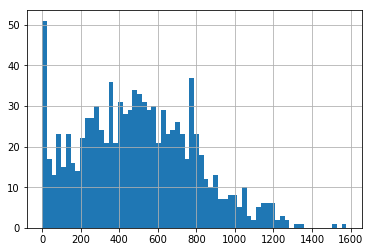

In [82]:
data_grouped.query('tariff == "ultra"')['minutes'].hist(bins=64)

In [83]:
data_grouped.query('tariff == "ultra"')['minutes'].describe()

count     985.000000
mean      497.068223
std       299.904152
min         0.000000
25%       267.750000
50%       488.100000
75%       711.470000
max      1578.060000
Name: minutes, dtype: float64

In [84]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Распределение похоже на нормальное – со скошенным краем слева (пользователи не могли наговорить отрицательное количество минут). 99% случаев (месяцев) пользователей тарифа "Ультра" потратили в месяц от 0 до 1382 минут. На гистограмме заметны выбросы на отметках около 400 и 800 минут – чем это объяснить, пока не ясно. Важно отметить, что все пользователи тарифа "Смарт" тратят в месяц до 3000 минут, то есть укладываются в ограничения тарифа. Максимальное значение в выборке – 1578 минут.

### Интернет – "Смарт"

In [85]:
s_int_mean = data_grouped.query('tariff == "smart"')['internet'].mean()
s_int_median = data_grouped.query('tariff == "smart"')['internet'].median()
s_int_var = np.var(data_grouped.query('tariff == "smart"')['internet'], ddof=1)
s_int_std = np.std(data_grouped.query('tariff == "smart"')['internet'], ddof=1)

In [86]:
s_int_bottom = s_int_mean-s_int_std*3
s_int_top = s_int_mean+s_int_std*3
s_int_bottom, s_int_top

(-1403.0430534661064, 33819.81703282907)

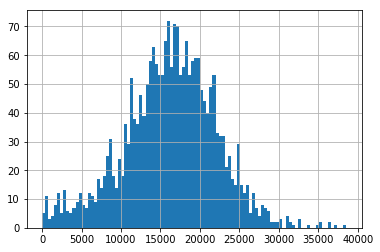

In [87]:
data_grouped.query('tariff == "smart"')['internet'].hist(bins=100)

In [88]:
data_grouped.query('tariff == "smart"')['internet'].describe()

count     2229.000000
mean     16208.386990
std       5870.476681
min          0.000000
25%      12643.010000
50%      16506.840000
75%      20042.930000
max      38552.450000
Name: internet, dtype: float64

In [89]:
data_grouped.query('tariff == "smart" and internet <= 15360')['internet'].shape[0]/data_grouped.query('tariff == "smart"')['internet'].shape[0]

0.41498429789143115

In [90]:
data_grouped.query('tariff == "smart" and internet > 15360')['internet'].describe()

count     1304.000000
mean     20070.498113
std       3587.410356
min      15362.360000
25%      17270.100000
50%      19395.165000
75%      21939.310000
max      38552.450000
Name: internet, dtype: float64

In [91]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Распределение похоже на нормальное. В 99% случаев за месяц пользователем тарифа "Смарт" было потрачено от 0 до 33381 Мб, то есть более 32 Гб интернет-трафика, при этом в тариф "Смарт" заложено – 15 Гб. В 41% случаев количество потраченного трафика выбивается сверх тарифа. То есть потребность в интернете превышает предложение тарифа для значительного числа пользователей. В 60% случаев докупают от 1 до 17 гб интернет-трафика, то есть доплачивают от 200 до 3400 рублей в месяц. 75% случаев, в которых пришлось докупать интернет были объемом до 7 Гб трафика, до есть доплата до 1400 рублей.

### Интернет – "Ультра"

In [92]:
u_int_mean = data_grouped.query('tariff == "ultra"')['internet'].mean()
u_int_median = data_grouped.query('tariff == "ultra"')['internet'].median()
u_int_var = np.var(data_grouped.query('tariff == "ultra"')['internet'], ddof=1)
u_int_std = np.std(data_grouped.query('tariff == "ultra"')['internet'], ddof=1)

In [93]:
u_int_bottom = u_int_mean-u_int_std*3
u_int_top = u_int_mean+u_int_std*3
u_int_bottom, u_int_top

(-10792.70704837624, 49730.31746461992)

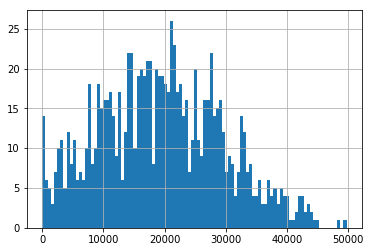

In [94]:
data_grouped.query('tariff == "ultra"')['internet'].hist(bins=100)

In [95]:
data_grouped.query('tariff == "ultra"')['internet'].describe()

count      985.000000
mean     19468.805208
std      10087.170752
min          0.000000
25%      11770.260000
50%      19308.010000
75%      26837.690000
max      49745.690000
Name: internet, dtype: float64

In [96]:
data_grouped.query('tariff == "ultra" and internet <= 30720')['internet'].shape[0]/data_grouped.query('tariff == "ultra"')['internet'].shape[0]

0.8639593908629442

In [97]:
data_grouped.query('tariff == "ultra" and internet > 30720')['internet'].describe()

count      134.000000
mean     36233.342537
std       4118.788339
min      30974.310000
25%      32951.405000
50%      35151.400000
75%      38931.832500
max      49745.690000
Name: internet, dtype: float64

In [98]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Распределение похоже на нормально с выбросом на отметке 0. Большинство (87%) случаев в тарифе "Ультра" укладываются в ограничения трафика – 30 Гб в месяц. Оставшиеся случаи – расход от 1 до 19 Гб дополнительного трафика. Это выплаты сверх тарифа от 150 до 2850 рублей в месяц. 75 % из случаев, в которых пришлось доплачивать ограничились 8 Гб в месяц.

### Сообщения – "Смарт"

In [99]:
s_mes_mean = data_grouped.query('tariff == "smart"')['messages'].mean()
s_mes_median = data_grouped.query('tariff == "smart"')['messages'].median()
s_mes_var = np.var(data_grouped.query('tariff == "smart"')['messages'], ddof=1)
s_mes_std = np.std(data_grouped.query('tariff == "smart"')['messages'], ddof=1)

In [100]:
s_mes_bottom = s_mes_mean-s_mes_std*3
s_mes_top = s_mes_mean+s_mes_std*3
s_mes_bottom, s_mes_top

(-51.299597957857145, 118.06765538271134)

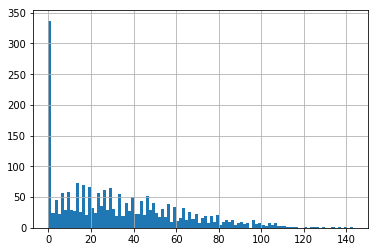

In [101]:
data_grouped.query('tariff == "smart"')['messages'].hist(bins=100)

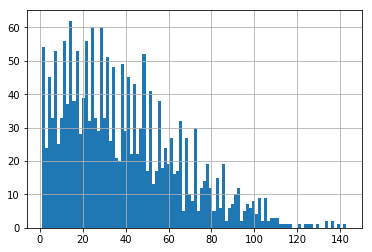

In [102]:
data_grouped.query('tariff == "smart" and messages != 0')['messages'].hist(bins=100)

In [103]:
data_grouped.query('tariff == "smart"')['messages'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages, dtype: float64

In [104]:
data_grouped.query('tariff == "smart" and messages == 0')['messages'].shape[0]/data_grouped.query('tariff == "smart"')['messages'].shape[0]

0.13772992373261553

In [105]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Распределение похоже на нормальное со скошенным краем слева. Заметен очень сильный выброс на отметке 0 – в 13% случаев пользователи тарифа "Смарт" вообще не отправляют смс сообщения. 99% выборки – месяцы, в которых пользователь отправил от 0 до 143 сообщений. Почти в 75% случаев пользователь умещался в лимит тарифа за месяц – 50 сообщений.

### Сообщения – "Ультра"

In [106]:
u_mes_mean = data_grouped.query('tariff == "ultra"')['messages'].mean()
u_mes_median = data_grouped.query('tariff == "ultra"')['messages'].median()
u_mes_var = np.var(data_grouped.query('tariff == "ultra"')['messages'], ddof=1)
u_mes_std = np.std(data_grouped.query('tariff == "ultra"')['messages'], ddof=1)

In [107]:
u_mes_bottom = u_mes_mean-u_mes_std*3
u_mes_top = u_mes_mean+u_mes_std*3
u_mes_bottom, u_mes_top

(-94.04992027387465, 192.77682382717416)

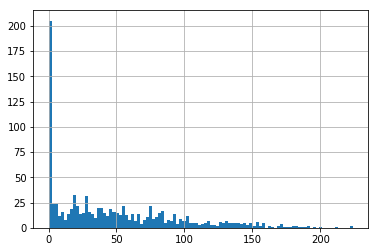

In [108]:
data_grouped.query('tariff == "ultra"')['messages'].hist(bins=100)

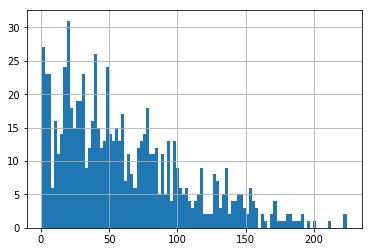

In [109]:
data_grouped.query('tariff == "ultra" and messages != 0')['messages'].hist(bins=100)

In [110]:
data_grouped.query('tariff == "ultra"')['messages'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages, dtype: float64

In [111]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Распредеделение не похоже на нормальное. Заметны сильные пики на отметках от 0 до нескольких сообщений. В четверти случаев пользователь тарифа "Ультра" отправляет до 6 сообщений в месяц. Все пользователи тарифа умещаются в лимит 1000 сообщений в месяц, максимальная отметка в выборке – 224. 99% выборки представлены месяцами, в которых пользователями было отправлено до 192 сообщений.

### Промежуточный итог (портрет ежемесячных потребностей пользователя тарифов "Смарт" и "Ультра"):
- пользователи тарифа "Смарт": в 28% не укладываются в тариф по звонкам, в 60% – по интернету, в 25% – по сообщениям.
- пользователи тарифа "Ультра": в 0% случаев не укладывабтся в тариф по звонкам, в 13% – по интернету, в 0% – по сообщениям.
- и тому, и другому сегменту пользователей не хватает отведенного в их тарифе интернета в месяц.

# Часть 4. Проверка гипотез

<a id='9-bullet'></a>
### 4.1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Нулевая гипотеза: средняя выручка пользователей тарифов "Ультра" и "Смарт" одинакова.

In [112]:
np.var(data_grouped.query('tariff == "smart"')['income'], ddof=1)/np.var(data_grouped.query('tariff == "ultra"')['income'], ddof=1)*100

469.34216784835775

Дисперсии выборок различаются почти в 5 раз.

In [113]:
alpha = 0.05
hyp_1_res = st.ttest_ind(
    data_grouped.query('tariff == "smart"')['income'], 
    data_grouped.query('tariff == "ultra"')['income'],
    equal_var=False)

print('p-значение:', hyp_1_res.pvalue)

if (hyp_1_res.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, то есть средняя выручка тарифов "Смарт" и "Ультра" различается.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, то есть средняя выручка тарифов "Смарт" и "Ультра" одинакова.') 

p-значение: 0.0
Отвергаем нулевую гипотезу, то есть средняя выручка тарифов "Смарт" и "Ультра" различается.


<a id='10-bullet'></a>
### 4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Добавим к сводной таблице колонку city из датасета users.

In [114]:
data_grouped = data_grouped.merge(users[['user_id','city']], how='left', on=['user_id'])

In [115]:
np.var(data_grouped.query('city == "Москва"')['income'], ddof=1)/np.var(data_grouped.query('city != "Москва"')['income'], ddof=1)*100

87.77495370860163

Дисперсии выборок различаются более, чем на 5%.

Нулевая гипотеза: средняя выручка пользователей из Москвы такая же, как средняя выручка пользователей из других регионов.

In [116]:
alpha = 0.05
hyp_2_res = st.ttest_ind(
    data_grouped.query('city == "Москва"')['income'], 
    data_grouped.query('city != "Москва"')['income'],
    equal_var=False)

print('p-значение:', hyp_2_res.pvalue)

if (hyp_2_res.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, то есть средняя выручка москвичей отличается от средней выручки пользователей из других регионов.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, то есть средняя выручка москвичей такая же, как и у пользователей других регионов.')

p-значение: 0.4097759312008292
Не получилось отвергнуть нулевую гипотезу, то есть средняя выручка москвичей такая же, как и у пользователей других регионов.


<a id='11-bullet'></a>
# Выводы

- На этапе подготовки данных из датасета были удалены звонки и интернет-сессии с нулевой длительностью: они не израсходовали ограничения тарифа. Их необходимо удалить, потому что пик на отметке ноль повлиет на медианные и средние значения, при этом в реальности на доход компании не влияет никак.


- Клиенты "Мегалайн":
    - в среднем говорят по 10-15 минут за телефонный звонок;
    - делятся на две группы: которая потребляет много интернета и мало интернета;
    - пик активности пользователей во всех сегментах – звонки, смс и интернет – приходится на вторую половину декабря.
    
    
- Из датасетов была создана сводная таблица, в неё были добавлены колонки с информацией:
    - о доходе, который клиент приносит компании в месяц;
    - о количестве месяцев, которые он является клиентом компании;
    - о среднем ежемесячном доходе компании с клиента.
    
    
- Большинство абонентов в выборке пользуются услугами компании менее года:
    - полгода и меньше (50%)
    - от 6 до 9 месяцев (25%)
    
    
- Тариф "Смарт" – самый популярный, им пользуются 70% пользователей. Более дорогой тариф "Ультра" выбирают 30% клиентов.


- Ежемесячные потребности пользователей:
    - абоненты тарифа "Смарт" в большинстве случаев укладываются в ограничения тарифа по звонкам (72%) и сообщениям (75%), гораздо реже этим клиентам удается уложиться в ограничения по трафику (59%)
    - абоненты тарифа "Ультра" всегда укладываются в ограничения тарифа по звонкам (100%) и сообщениям (100%), почти всегда укладываются в ограничения по интернет-трафику (87%).
    - общая болевая точка для клиентов обоих тарифов: нехватка интернет-трафика.


- Средний ежемесячный доход с клиента:
    - тариф "Смарт": средний ежемесячный доход с клиента – 1228 рублей в месяц, то есть почти в два раза больше, чем базовая стоимость тарифа (550 рублей). Медианное значение – 1098 рублей, значит, есть небольшая часть клиентов, которые переплачивают сверх тарифа крупные суммы, которая сдвигает среднее значение в большую сторону.
    - тариф "Ультра": средний ежемесячный доход с клиента – 2074 рубля в месяц, это почти равно ежемесячной выплате по тарифу, 1950 рублей. Медианное значение (1950 руб.) равно ежемесячной сумме, значит на среднее повлияли малочисленные пользователи тарифа с крупными переплатами.
    - судя по медианным и средним значениям, пользователи тарифа "Ультра" почти не выходят сверх ограничений, в то время как пользователи более дешового тарифа "Смарт" очень часто выходят из ограничений и в итоге платят двойную стоимость тарифа и более.
    
    
- Гипотезу о том, что средняя выручка пользователей тарифов "Смарт" и "Ультра" различается не удалось отвергнуть. Средние показатели не противоречат этому: средняя ежемесячная выручка с клиента тарифа "Смарт" почти в два раза больше средней ежемесячной выручки с клиента тарифа "Ультра".


- Гипотезу о том, что средняя выручка московских пользователей "Мегалайн" отличается от средней выручки пользователей из регионов, удалось отвергнуть. Пользователи по всей стране приносят компании сопоставимый доход.


- В продвижение какого тарифа стоит вложиться:
    - Несмотря на то, что ограничения тарифа "Смарт" заставляют многих клиентов платить двойную, тройную и четырехкратную стоимость своего тарифа в месяц, в общем клиенты этого, более дешового тарифа, приносят компании меньше денег, чем клиенты тарифа Ультра. 1228 руб. в месяц против 2074 рублей в месяц, если сравнивать средние значения.

    - Тем не менее, клиенты, выбравшие тариф "Смарт" вряд ли перейдут на тариф "Ультра": 75% процентов клиентов "Смарт" укладываются в рамки расходов от 550 до 1550 рублей в месяц, поэтому с малой вероятностью будут готовы сменить тариф, который будет обозначать базовый ежемесячный расход в 1950 рублей в месяц.

    - А вот клиенты, выбравшие такой прибыльный тариф "Ультра" могут попробовать перейти на тариф "Смарт": многие клиенты тарифа "Ультра" не расходуют столько звонков, сообщений и интернета, сколько им предлагает тариф.


<font color='green'>Приоритетный в продвижении – тариф "Ультра". Необходимо сохранять уже имеющихся абонентов и обращать внимание новых клиентов именно на этот тариф.</font>